In [1]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.8 MB/s eta 0:00:00


In [3]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 52.8 MB/s eta 0:00:00


In [4]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [5]:
from qiskit_aer.noise import NoiseModel,depolarizing_error

In [6]:
qc=QuantumCircuit(3,3)

In [7]:
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.measure([0,1,2],[0,1,2])

In [8]:
noise_model = NoiseModel()

In [9]:
# Add depolarizing noise for single-qubit gates and two-qubit gates
depol_1q = depolarizing_error(0.01, 1)
depol_2q = depolarizing_error(0.02, 2)
noise_model.add_all_qubit_quantum_error(depol_1q, ['u3', 'x', 'h'])
noise_model.add_all_qubit_quantum_error(depol_2q, ['cx'])

In [10]:
# Use AerSimulator and noise model for simulation
backend = AerSimulator()

In [11]:
# Execute the quantum circuit with noise model
result_with_noise = backend.run(qc,noise_model=noise_model, shots=1024).result()

In [12]:
# Get the raw counts with noise
noisy_counts = result_with_noise.get_counts(qc)

In [13]:
# Simple mitigation technique: scale counts based on expected noise
mitigated_counts = {key: noisy_counts[key] * (1 - 0.02) for key in noisy_counts}

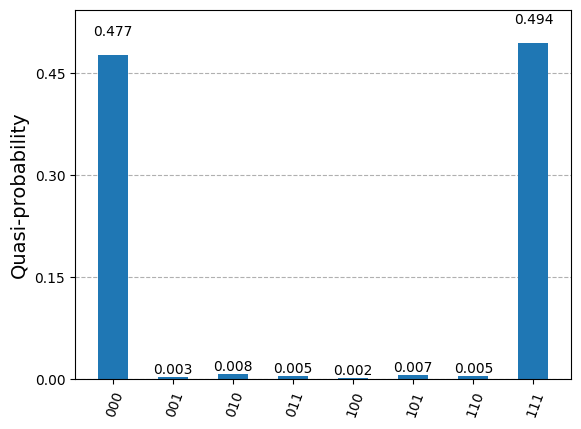

In [14]:
# Plot the mitigated results
plot_histogram(mitigated_counts)

In [15]:
print("Original counts:")
print(noisy_counts)

Original counts:
{'100': 2, '110': 5, '001': 3, '101': 7, '010': 8, '000': 488, '011': 5, '111': 506}


In [16]:
print("Mitigated counts:")
print(mitigated_counts)

Mitigated counts:
{'100': 1.96, '110': 4.9, '001': 2.94, '101': 6.859999999999999, '010': 7.84, '000': 478.24, '011': 4.9, '111': 495.88}


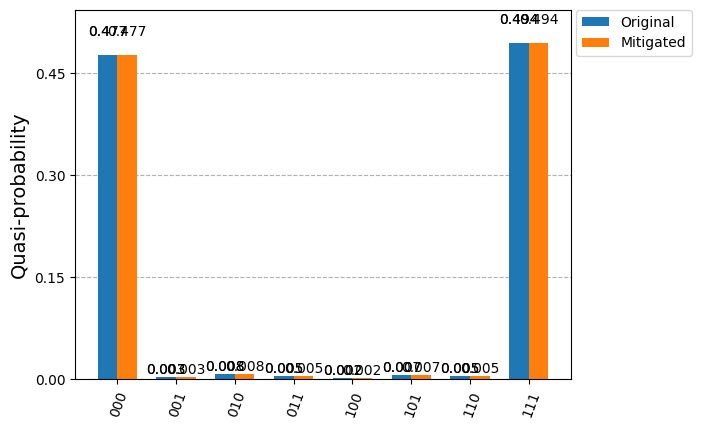

In [17]:
plot_histogram([noisy_counts, mitigated_counts], legend=['Original', 'Mitigated'])